## Author:Ronak Patel
Using Pandas library 
Diffrent type of function, i had use to create report I could have used the same method to do all the requriment,
but going by diffrent approach every time I would explore more area of pandas library.


In [1]:
import pandas as p
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as mat
%matplotlib inline


In [2]:
data = p.read_csv('a4.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       26052 non-null  object
 1   Date       26052 non-null  object
 2   Card Type  26052 non-null  object
 3   Exp Type   26052 non-null  object
 4   Gender     26052 non-null  object
 5   Amount     26052 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [196]:
data['Date']= p.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   City       26052 non-null  object        
 1   Date       26052 non-null  datetime64[ns]
 2   Card Type  26052 non-null  object        
 3   Exp Type   26052 non-null  object        
 4   Gender     26052 non-null  object        
 5   Amount     26052 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.2+ MB


In [197]:
data.set_index('Date', inplace=True);data


,City,Card Type,Exp Type,Gender,Amount
Date,,,,,
2014-10-29,"Delhi, India",Gold,Bills,F,82475
2014-08-22,"Greater Mumbai, India",Platinum,Bills,F,32555
2014-08-27,"Bengaluru, India",Silver,Bills,F,101738
2014-04-12,"Greater Mumbai, India",Signature,Bills,F,123424
2015-05-05,"Bengaluru, India",Gold,Bills,F,171574
...,...,...,...,...,...
2014-06-22,"Kolkata, India",Silver,Travel,F,128191
2014-08-03,"Pune, India",Signature,Travel,M,246316
2015-01-16,"Hyderabad, India",Silver,Travel,M,265019


In [198]:
year = data.resample('A').sum()
year = year.reset_index();year


,Date,Amount
0,2013-12-31,613643884
1,2014-12-31,2454714033
2,2015-12-31,1006475456


In [199]:
city = data.groupby((['City']) + (['Date'])).sum()
city

Amount
City             Date              
Achalpur, India  2013-12-06  201032
                 2014-02-06  178612
                 2014-04-19  138246
                 2014-05-29   55347
                 2014-05-30  216180
...                             ...
Zirakpur, India  2014-12-08  175566
                 2015-04-08  289172
Zunheboto, India 2013-11-04   89271
                 2014-03-29  298567
                 2014-12-01   78591

[11766 rows x 1 columns]

In [200]:
city = city.reset_index()
city


,City,Date,Amount
0,"Achalpur, India",2013-12-06,201032
1,"Achalpur, India",2014-02-06,178612
2,"Achalpur, India",2014-04-19,138246
3,"Achalpur, India",2014-05-29,55347
4,"Achalpur, India",2014-05-30,216180
...,...,...,...
11761,"Zirakpur, India",2014-12-08,175566
11762,"Zirakpur, India",2015-04-08,289172
11763,"Zunheboto, India",2013-11-04,89271
11764,"Zunheboto, India",2014-03-29,298567


In [201]:
year2013 = city.loc[(city['Date']<='2013-12-31')].sort_values(by='Amount',ascending=False)
year2014 = city.loc[(city['Date']<='2014-12-31') & (city['Date'] > '2013-12-31') ].sort_values(by='Amount',ascending=False)
year2015 = city.loc[(city['Date']<='2015-12-31') & (city['Date'] > '2014-12-31') ].sort_values(by='Amount',ascending=False)


In [202]:

year2013 = year2013.groupby(['City']).sum().sort_values(by='Amount',ascending=False).head(5)
year2013 = year2013.reset_index();year2013


year2014 = year2014.groupby(['City']).sum().sort_values(by='Amount',ascending=False).head(5)
year2014 = year2014.reset_index();year2014


year2015 = year2015.groupby(['City']).sum().sort_values(by='Amount',ascending=False).head(5)
year2015 = year2015.reset_index();year2015

year2015

,City,Amount
0,"Delhi, India",145211065
1,"Greater Mumbai, India",142306409
2,"Ahmedabad, India",136213286
3,"Bengaluru, India",135845357
4,"Kolkata, India",30918731


In [203]:
list1 =['2013','2013','2013','2013','2013']
list2=['2014','2014','2014','2014','2014']
list3=['2015','2015','2015','2015','2015']
year2013['ExpensesDoneByCity']=list1;year2013
year2014['ExpensesDoneByCity']=list2;year2014
year2015['ExpensesDoneByCity']=list3;year2015


,City,Amount,ExpensesDoneByCity
0,"Delhi, India",145211065,2015
1,"Greater Mumbai, India",142306409,2015
2,"Ahmedabad, India",136213286,2015
3,"Bengaluru, India",135845357,2015
4,"Kolkata, India",30918731,2015


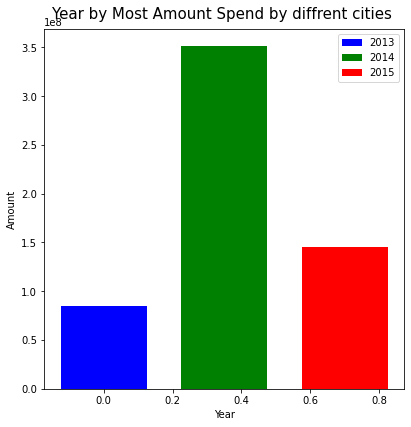

In [208]:
fig  = mat.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(0.00, year2013['Amount'],color = 'b', width = 0.25)
ax.bar(0.35, year2014['Amount'], color = 'g', width = 0.25)
ax.bar(0.70, year2015['Amount'], color = 'r', width = 0.25)
ax.set_title('Year by Most Amount Spend by diffrent cities ', size=15, pad=10)
ax.set_xlabel('Year')
ax.set_ylabel('Amount')
ax.legend(labels=['2013', '2014','2015'])

Text(0.5, 1.0, 'Amount of 2015')

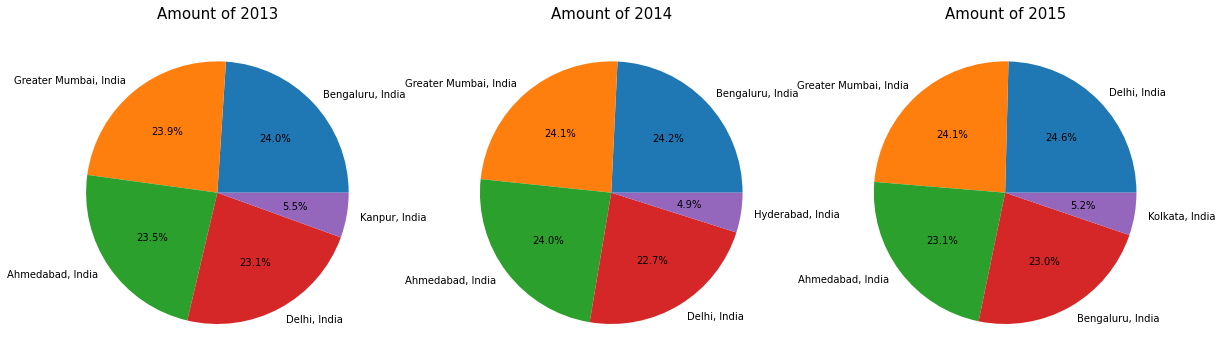

In [33]:
# fig  = mat.figure(figsize=(5,5))

fig,axis= mat.subplots(1,3,figsize=(20,10))

# axis = fig.add_axes([0, 0, 1, 1])
axis[0].pie(year2013['Amount'], labels=year2013['City'],
         autopct='%.1f%%')
axis[0].set_title('Amount of 2013', size=15, pad=10)

axis[1].pie(year2014['Amount'], labels=year2014['City'],
         autopct='%.1f%%')
axis[1].set_title('Amount of 2014', size=15, pad=10)

axis[2].pie(year2015['Amount'], labels=year2015['City'],
         autopct='%.1f%%')
axis[2].set_title('Amount of 2015', size=15, pad=10)

In [34]:
year2013 = year2013.pivot('ExpensesDoneByCity','City','Amount')
year2013 = year2013.sort_values(by = ['2013'],axis = 1,ascending = False);year2013
year2014 = year2014.pivot('ExpensesDoneByCity','City','Amount')
year2014 = year2014.sort_values(by = ['2014'],axis = 1,ascending = False);year2014
year2015 = year2015.pivot('ExpensesDoneByCity','City','Amount')
year2015 = year2015.sort_values(by = ['2015'],axis = 1,ascending = False);year2015

City,"Delhi, India","Greater Mumbai, India","Ahmedabad, India","Bengaluru, India","Kolkata, India"
ExpensesDoneByCity,,,,,
2015,145211065,142306409,136213286,135845357,30918731


In [35]:
writer = p.ExcelWriter('report1.xlsx', engine='xlsxwriter')

year2013.to_excel(writer,sheet_name='2013')
year2014.to_excel(writer,sheet_name='2014')
year2015.to_excel(writer,sheet_name='2015')
writer.save()

### Second report by male and female by quartely.


In [36]:
quarterly = data.resample('QS').sum()
quarterly = quarterly.reset_index()
quarterly['Date'] = quarterly['Date'].dt.strftime("%Y%m%d").astype(int)
qlist = quarterly["Date"].tolist();qlist
qlist.append(20150701)
qlist.append(20151001)

In [37]:
data4 = data
data4 = data4.reset_index()
data4["quarterly"] = data4["Date"].dt.quarter;data4
data4["year"] = data4["Date"].dt.year;data4
data4['Date']= data4['Date'].dt.strftime("%Y%m%d").astype(int)


In [168]:
for i in range(0,1,len(qlist)):
    globals()[f"quarter{i}"]=data4.loc[(data4['Date'] >= (qlist[i]))&(data4['Date'] < (qlist[i + 1]))].groupby(['Gender']).sum()
    globals()[f"quarter{i}"]=globals()[f"quarter{i}"].drop(columns=['Date', 'quarterly','year']).reset_index()
    print("hello")
quarter1



hello


,Gender,Amount
0,F,318768288
1,M,281336181


Text(0.5, 1.0, 'Amount of 2015 quarter2')

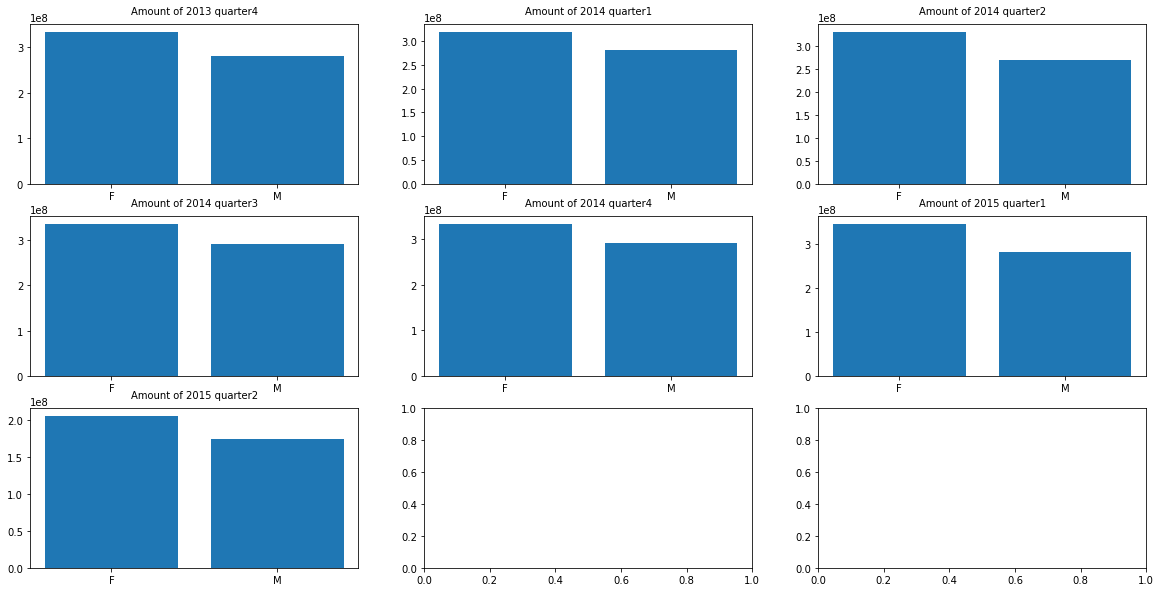

In [169]:

fig,axis= mat.subplots(3,3,figsize=(20,10))

axis[0,0].bar( quarter0["Gender"],quarter0['Amount'])
axis[0,0].set_title('Amount of 2013 quarter4', size=10, pad=10)

axis[0,1].bar( quarter1["Gender"],quarter1['Amount'])
axis[0,1].set_title('Amount of 2014 quarter1', size=10, pad=10)

axis[0,2].bar( quarter2["Gender"],quarter2['Amount'])
axis[0,2].set_title('Amount of 2014 quarter2', size=10, pad=10)

axis[1,0].bar( quarter3["Gender"],quarter3['Amount'])
axis[1,0].set_title('Amount of 2014 quarter3', size=10, pad=10)

axis[1,1].bar( quarter4["Gender"],quarter4['Amount'])
axis[1,1].set_title('Amount of 2014 quarter4', size=10, pad=10)

axis[1,2].bar( quarter5["Gender"],quarter5['Amount'])
axis[1,2].set_title('Amount of 2015 quarter1', size=10, pad=10)

axis[2,0].bar( quarter6["Gender"],quarter6['Amount'])
axis[2,0].set_title('Amount of 2015 quarter2', size=10, pad=10)

In [188]:
ql=['Quarter1 2013','Quarter2 2013','Quarter3 2013','Quarter4 2013',
    ]
q2=['Quarter1 2014','Quarter2 2014','Quarter3 2014','Quarter4 2014',
    ]
q3=['Quarter1 2015','Quarter2 2015','Quarter3 2015','Quarter4 2015',
    ]
l1=[[np.nan,np.nan,np.nan,quarter0['Amount'][1]],[np.nan,np.nan,np.nan,quarter0['Amount'][0]]]
l2=[[quarter1['Amount'][1],quarter2['Amount'][1],quarter3['Amount'][1],quarter4['Amount'][1]],
    [quarter1['Amount'][0],quarter2['Amount'][0],quarter3['Amount'][0],quarter4['Amount'][0]]]
l3=[[quarter5['Amount'][1],quarter6['Amount'][1],np.nan,np.nan],[quarter5['Amount'][0],quarter6['Amount'][0],np.nan,np.nan]]

Report2013 = p.DataFrame(data=l1,columns=ql)
Report2014 = p.DataFrame(data=l2,columns=q2)
Report2015 = p.DataFrame(data=l3,columns=q3)

Report2013 = Report2013.rename(index={0: "Male", 1: "Female"})

Report2014 = Report2014.rename(index={0: "Male", 1: "Female"})

Report2015 = Report2015.rename(index={0: "Male", 1: "Female"})
Report2013 = Report2013.fillna(0) 
Report2014 = Report2014.fillna(0)
Report2015 = Report2015.fillna(0)
Report2015


,Quarter1 2015,Quarter2 2015,Quarter3 2015,Quarter4 2015
Male,279678969,175169620,0.0,0.0
Female,344993188,206633679,0.0,0.0


Text(0.5, 1.0, 'Quarter BoxPlot of 2015')

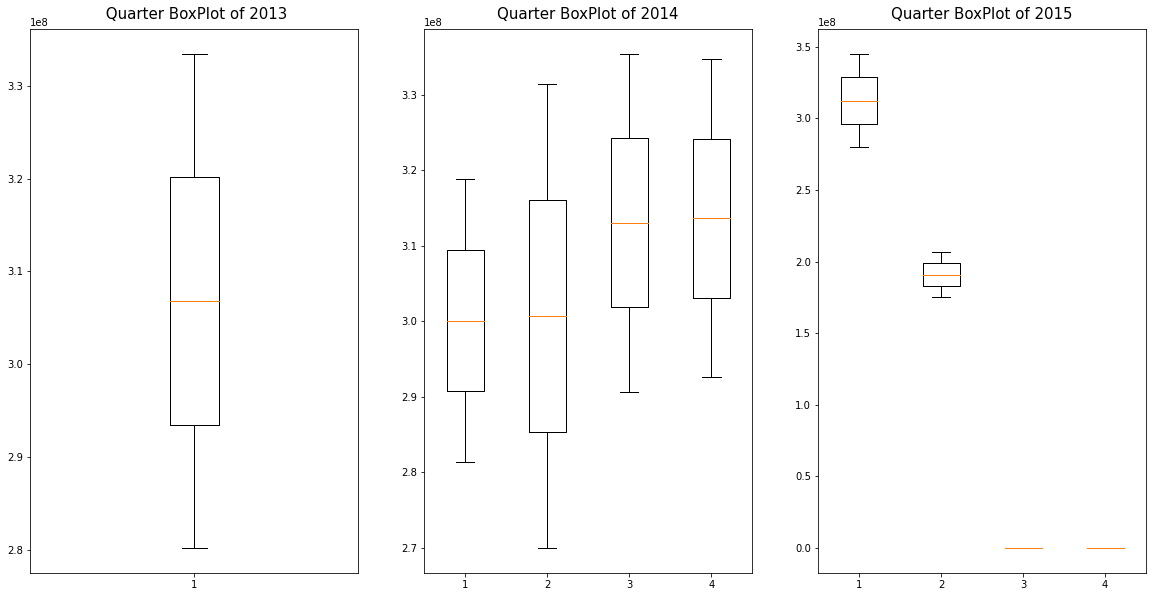

In [191]:
fig,axis= mat.subplots(1,3,figsize=(20,10))


axis[0].boxplot(Report2013["Quarter4 2013"])
axis[0].set_title(' Quarter BoxPlot of 2013', size=15, pad=10)

axis[1].boxplot(Report2014)
axis[1].set_title('Quarter BoxPlot of 2014', size=15, pad=10)

axis[2].boxplot(Report2015)
axis[2].set_title('Quarter BoxPlot of 2015', size=15, pad=10)


In [172]:
writer = p.ExcelWriter('report2.xlsx', engine='xlsxwriter')
Report2013.to_excel(writer,sheet_name='2013')
Report2014.to_excel(writer,sheet_name='2014')
Report2015.to_excel(writer,sheet_name='2015')
writer.save()

### Report by the expenses type

In [173]:
data3 = data
data3 = data3.reset_index()
data3['year'] = data3['Date'].dt.year
rep = data3.groupby(['year','Exp Type']).sum()
#rep = rep.reset_index();rep
rep

Amount
year Exp Type                
2013 Bills          136165014
     Entertainment  113094669
     Food           123284967
     Fuel           113938738
     Grocery        111806890
     Travel          15353606
2014 Bills          543741413
     Entertainment  443730570
     Food           491383057
     Fuel           481697184
     Grocery        428628961
     Travel          65532848
2015 Bills          227166046
     Entertainment  169612297
     Food           210055985
     Fuel           193499899
     Grocery        177772072
     Travel          28369157

In [177]:
sep = rep.reset_index()

sep13 = sep.loc[(sep['year'] == 2013 )].groupby(['year','Exp Type']).sum()
sep13 = sep13.reset_index()
sep14 = sep.loc[(sep['year'] == 2014 )].groupby(['year','Exp Type']).sum()
sep14 = sep14.reset_index()
sep15 = sep.loc[(sep['year'] == 2015 )].groupby(['year','Exp Type']).sum()
sep15 = sep15.reset_index()


Text(0.5, 1.0, ' Amount spend by Expense type of 2015')

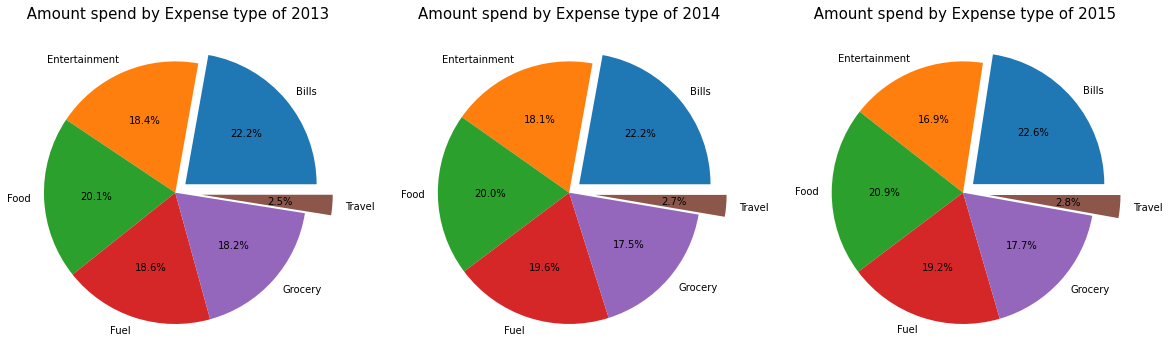

In [183]:
fig,axis= mat.subplots(1,3,figsize=(20,10))
pie_space = [0.1,0,0,0,0,0.2]
axis[0].pie(sep13['Amount'], labels=sep13["Exp Type"],explode = pie_space,
         autopct='%.1f%%')
axis[0].set_title(' Amount spend by Expense type of 2013', size=15, pad=10)

axis[1].pie(sep14['Amount'], labels=sep14["Exp Type"],explode = pie_space,
         autopct='%.1f%%')
axis[1].set_title('Amount spend by Expense type of 2014', size=15, pad=10)

axis[2].pie(sep15['Amount'], labels=sep15["Exp Type"],explode = pie_space,
         autopct='%.1f%%')
axis[2].set_title(' Amount spend by Expense type of 2015', size=15, pad=10)

In [78]:

engine = create_engine('sqlite://', echo=False)
#here I use pandas libray wich have bulitn in functo that can mimic dataframe as database
rep.to_sql('expense', con=engine)
rep2013 = engine.execute("SELECT * FROM expense WHERE year = 2013 ORDER BY Amount DESC LIMIT 3 ").fetchall()
rep2014 = engine.execute("SELECT * FROM expense WHERE year = 2014 ORDER BY Amount DESC LIMIT 3 ").fetchall()
rep2015 = engine.execute("SELECT * FROM expense WHERE year = 2015 ORDER BY Amount DESC LIMIT 3 ").fetchall()
report32013= p.DataFrame(rep2013, columns=['year', 'ExpType','Amount']);report32013
report32014= p.DataFrame(rep2014, columns=['year', 'ExpType','Amount']);report32014
report32015= p.DataFrame(rep2015, columns=['year', 'ExpType','Amount']);report32015
report32013=report32013.pivot(index='year', columns='ExpType', values='Amount').sort_values(by=2013,axis=1,ascending=True);report32013
report32014=report32014.pivot(index='year', columns='ExpType', values='Amount').sort_values(by=2014,axis=1,ascending=True);report32014
report32015=report32015.pivot(index='year', columns='ExpType', values='Amount').sort_values(by=2015,axis=1,ascending=True);report32015

ExpType,Fuel,Food,Bills
year,,,
2015,193499899,210055985,227166046


In [79]:
writer = p.ExcelWriter('report3.xlsx', engine='xlsxwriter')
report32013.to_excel(writer,sheet_name='2013')
report32014.to_excel(writer,sheet_name='2014')
report32015.to_excel(writer,sheet_name='2015')
writer.save()


### Find the Fraud transaction in the dataset. ^_^

In [80]:
data5 = data 
data5 = data5.reset_index();data

,City,Card Type,Exp Type,Gender,Amount
Date,,,,,
2014-10-29,"Delhi, India",Gold,Bills,F,82475
2014-08-22,"Greater Mumbai, India",Platinum,Bills,F,32555
2014-08-27,"Bengaluru, India",Silver,Bills,F,101738
2014-04-12,"Greater Mumbai, India",Signature,Bills,F,123424
2015-05-05,"Bengaluru, India",Gold,Bills,F,171574
...,...,...,...,...,...
2014-06-22,"Kolkata, India",Silver,Travel,F,128191
2014-08-03,"Pune, India",Signature,Travel,M,246316
2015-01-16,"Hyderabad, India",Silver,Travel,M,265019


In [81]:
data5.describe()

,Amount
count,26052.000000
mean,156411.537425
std,103063.254287
min,1005.000000
25%,77120.250000
50%,153106.500000
75%,228050.000000
max,998077.000000


#### There seems to be in bills expense type are perform, I am assuming credit card company, can clasify the transacation in diffrent category, but most of the fraud took place end most of timre it classified in bill section.
I will explore the bill type in more details to detect the fraud.
I will took 228050 this value because almost this amount fall in 3 quartile 
aprox I can say top 250 to 370 records can be fraud out of 524 records.

In [82]:

amountfraud = data5.loc[(data5['Amount'] > 228050)].sort_values(by='Amount',ascending=False).groupby(by=['Card Type','Exp Type','Date']).sum();
amountfraud = amountfraud.reset_index();amountfraud
fraud = amountfraud.loc[(amountfraud['Amount'] > 228050) & (amountfraud['Exp Type'] == 'Bills') & ((amountfraud['Card Type'] =='Silver') | (amountfraud['Card Type'] =='Signature'))].sort_values(by='Amount',ascending=False)
fraud.to_excel('fraud.xlsx')
fraud

,Card Type,Exp Type,Date,Amount
2673,Signature,Bills,2015-02-15,2376322
3834,Silver,Bills,2014-03-25,2241505
3977,Silver,Bills,2015-01-30,1823778
2477,Signature,Bills,2013-12-07,1723162
2561,Signature,Bills,2014-07-01,1619530
...,...,...,...,...
3763,Silver,Bills,2013-10-27,228689
3974,Silver,Bills,2015-01-21,228626
3893,Silver,Bills,2014-08-10,228355
3903,Silver,Bills,2014-08-26,228302


In [215]:
bill = amountfraud.groupby(['Exp Type','Card Type']).sum()
bill = bill.reset_index();bill
bill =bill.pivot('Card Type','Exp Type','Amount');bill


Exp Type,Bills,Entertainment,Food,Fuel,Grocery,Travel
Card Type,,,,,,
Gold,121284189,68326010,79075721,80722127,67595687,13373909
Platinum,118815705,83892849,90134800,76976373,70491891,8605810
Signature,125518351,81429207,92471641,77346985,78668045,10901564
Silver,124490998,81974974,86515995,96262415,84377987,12597013


Text(0.5, 1.0, 'BoxPlot for fraud dataset')

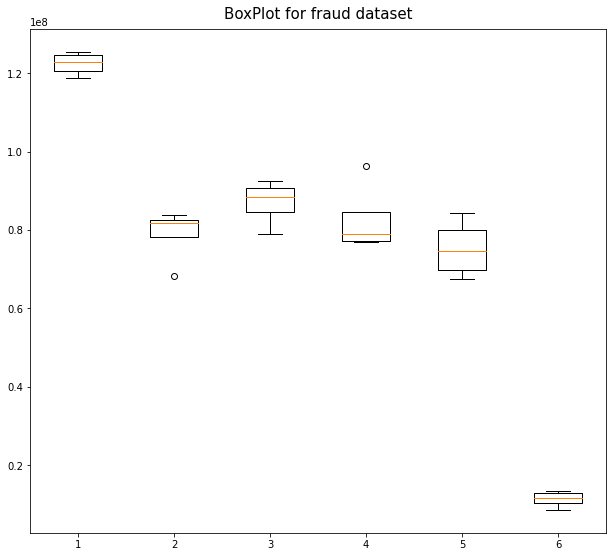

In [223]:
fig = mat.figure(figsize=(8,7))
axis = fig.add_axes([0,0,1,1])

axis.boxplot(bill)
axis.set_title('BoxPlot for fraud dataset', fontsize=15, pad=10)
